# Guide to different CNN Architectures using keras:
## In this tutorial i am going to explain 5 different CNN architectures which are commonly used.
## 1. VGG16/19
## 2. GoogLeNet/Inception
## 3. Xception
## 4. Mobile net
## 5. Resnet

### Note: I am not going to train model on longer epochs my solely aim is to illustrate how different architectures works.If you want to get better accuracy and performance of the model please make deeper models and run for many epochs and tune the hyperparameters and also i commented some code blocks as they are taking longer time to run if you want to run them uncomment them.

# Importing libraries.

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
import numpy as np
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
print(os.listdir("../input"))

import numpy as np

Using TensorFlow backend.


['train', 'test', 'train.csv', 'sample_submission.csv']


# Importing data 

In [2]:
train_dir="../input/train/train"
test_dir="../input/test/test"
train=pd.read_csv('../input/train.csv')
train.has_cactus=train.has_cactus.astype(str)
df_test=pd.read_csv('../input/sample_submission.csv')

In [3]:
train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [4]:
train.shape

(17500, 2)

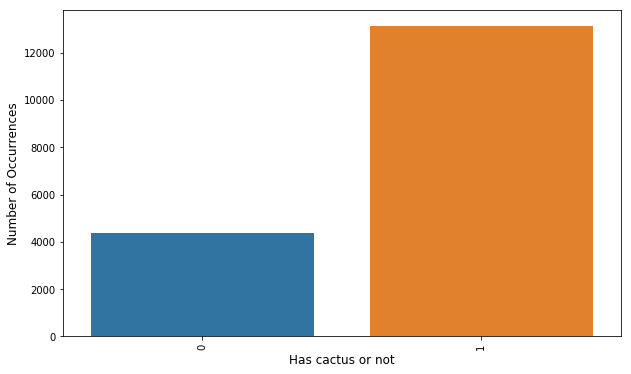

In [5]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'has_cactus',data = train)
plt.xticks(rotation='vertical')
plt.xlabel('Has cactus or not', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [6]:
print("The number of images in test set is %d"%(len(os.listdir('../input/test/test'))))

The number of images in test set is 4000


# Sample image

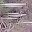

In [7]:
Image(os.path.join("../input/train/train",train.iloc[0,0]),width=250,height=250)

In [8]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=150

In [9]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:15001],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))


validation_generator=datagen.flow_from_dataframe(dataframe=train[15000:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(150,150))


Found 15001 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


# Introduction to CNN's
In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.
CNN image classifications takes an input image, process it and classify it under certain categories (Eg., Dog, Cat, Tiger, Lion). Computers sees an input image as array of pixels and it depends on the image resolution. Based on the image resolution, it will see h x w x d( h = Height, w = Width, d = Dimension ). Eg., An image of 6 x 6 x 3 array of matrix of RGB (3 refers to RGB values) and an image of 4 x 4 x 1 array of matrix of grayscale image. The below image shows the array of RGB matrix
![Array of RGB Matrix](https://miro.medium.com/max/289/1*CBY94wikMUCZMB4-Xxs-pw.png)
Technically, deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.
![](https://miro.medium.com/max/875/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg)
## Covolution layer:
Convolution is the first layer to extract features from an input image. Convolution preserves the relationship between pixels by learning image features using small squares of input data. It is a mathematical operation that takes two inputs such as image matrix and a filter or kernal
![](https://miro.medium.com/max/576/1*kYSsNpy0b3fIonQya66VSQ.png)
Consider a 5 x 5 whose image pixel values are 0, 1 and filter matrix 3 x 3 and Then the convolution of 5 x 5 image matrix multiplies with 3 x 3 filter matrix which is called “Feature Map” as output shown in below
![](https://miro.medium.com/max/335/1*MrGSULUtkXc0Ou07QouV8A.gif)
Convolution of an image with different filters can perform operations such as edge detection, blur and sharpen by applying filters.
## Strides:
Stride is the number of pixels shifts over the input matrix. When the stride is 1 then we move the filters to 1 pixel at a time. When the stride is 2 then we move the filters to 2 pixels at a time and so on. The below figure shows convolution would work with a stride of 2.
![](https://miro.medium.com/max/869/1*nGHLq1hx0gt02OK4l8WmRg.png)
## Padding:
Sometimes filter does not perfectly fit the input image. We have two options:
1. Pad the picture with zeros (zero-padding) so that it fits
2. Drop the part of the image where the filter did not fit. This is called valid padding which keeps only valid part of the image.
## Non Linearity:
ReLU stands for Rectified Linear Unit for a non-linear operation. The output is ƒ(x) = max(0,x).
**Why ReLU is important** : ReLU’s purpose is to introduce non-linearity in our ConvNet. Since, the real world data would want our ConvNet to learn would be non-negative linear values.
![](https://miro.medium.com/max/561/1*gcvuKm3nUePXwUOLXfLIMQ.png)
There are other non linear functions such as tanh or sigmoid can also be used instead of ReLU. Most of the data scientists uses ReLU since performance wise ReLU is better than other two.
## Pooling Layer:
Pooling layers section would reduce the number of parameters when the images are too large. Spatial pooling also called subsampling or downsampling which reduces the dimensionality of each map but retains the important information. Spatial pooling can be of different types:
* Max Pooling
* Average Pooling
* Sum Pooling
Max pooling take the largest element from the rectified feature map. Taking the largest element could also take the average pooling. Sum of all elements in the feature map call as sum pooling.
![](https://miro.medium.com/max/753/1*SmiydxM5lbTjoKWYPiuzWQ.png)
## Fully Connected Layer:
The layer we call as FC layer, we flattened our matrix into vector and feed it into a fully connected layer like neural network.
![](https://miro.medium.com/max/693/1*Mw6LKUG8AWQhG73H1caT8w.png)
In the above diagram, feature map matrix will be converted as vector (x1, x2, x3, …). With the fully connected layers, we combined these features together to create a model. Finally, we have an activation function such as softmax or sigmoid to classify the outputs as cat, dog, car, truck or what ever class you want etc.,
## Complete Cnn Architecture:
![](https://miro.medium.com/max/875/1*4GLv7_4BbKXnpc6BRb0Aew.png)

# Building CNN model:

We will build our model such that it contains 5 Conv2D + Maxpooling2D stages with relu activation function.

#### Credits and references : This basic cnn model is taken from this [kernel](https://www.kaggle.com/shahules/getting-started-with-cnn-and-vgg16)

In [10]:
#Reference : https://www.kaggle.com/shahules/getting-started-with-cnn-and-vgg16
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
         

## Getting the summary of the model:

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Compiling our model:
* Loss : Here we are using binary cross entropy as our loss function.The below is the formula for binary cross entropy.
   **−∑iyilogy^i−∑i(1−yi)log(1−y^i)**.
* Optimizer : We are using Adam as a optimiser.
* metric : we are using accuracy as metric.

In [12]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.adam(),metrics=['acc'])

# Fitting the model:
## we are going to fit the model for 5 epochs.

In [13]:
epochs=5
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=5,validation_data=validation_generator,validation_steps=50)


Epoch 1/5
100/100 [==============================] - 47s 472ms/step - loss: 0.2463 - acc: 0.8996 - val_loss: 0.1524 - val_acc: 0.9436
Epoch 2/5
100/100 [==============================] - 19s 193ms/step - loss: 0.1585 - acc: 0.9424 - val_loss: 0.1114 - val_acc: 0.9572
Epoch 3/5
100/100 [==============================] - 19s 191ms/step - loss: 0.1134 - acc: 0.9568 - val_loss: 0.0713 - val_acc: 0.9780
Epoch 4/5
100/100 [==============================] - 19s 187ms/step - loss: 0.0673 - acc: 0.9739 - val_loss: 0.0746 - val_acc: 0.9736
Epoch 5/5
100/100 [==============================] - 19s 188ms/step - loss: 0.0624 - acc: 0.9767 - val_loss: 0.0554 - val_acc: 0.9828


# Evaluating our model:


#### Number of epochs vs training and validation accuracy

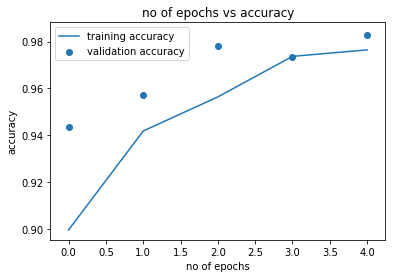

In [14]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

#### Number of epochs vs training and validation loss.

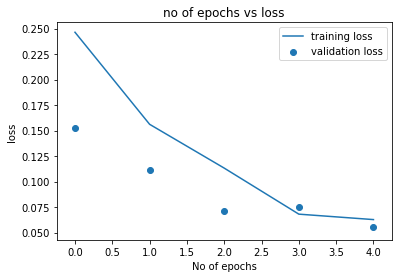

In [15]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

# Getting started with brief introductions to diferent architectures:

# VGG16:
VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.
## The Architecture:
![](https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network.jpg)
The input to cov1 layer is of fixed size 224 x 224 RGB image. The image is passed through a stack of convolutional (conv.) layers, where the filters were used with a very small receptive field: 3×3 (which is the smallest size to capture the notion of left/right, up/down, center). In one of the configurations, it also utilizes 1×1 convolution filters, which can be seen as a linear transformation of the input channels (followed by non-linearity). The convolution stride is fixed to 1 pixel; the spatial padding of conv. layer input is such that the spatial resolution is preserved after convolution, i.e. the padding is 1-pixel for 3×3 conv. layers. Spatial pooling is carried out by five max-pooling layers, which follow some of the conv.  layers (not all the conv. layers are followed by max-pooling). Max-pooling is performed over a 2×2 pixel window, with stride 2.

Three Fully-Connected (FC) layers follow a stack of convolutional layers (which has a different depth in different architectures): the first two have 4096 channels each, the third performs 1000-way ILSVRC classification and thus contains 1000 channels (one for each class). The final layer is the soft-max layer. The configuration of the fully connected layers is the same in all networks.

All hidden layers are equipped with the rectification (ReLU) non-linearity. It is also noted that none of the networks (except for one) contain Local Response Normalisation (LRN), such normalization does not improve the performance on the ILSVRC dataset, but leads to increased memory consumption and computation time.
## Configurations:
All configurations follow the generic design present in architecture and differ only in the depth: from 11 weight layers in the network A (8 conv. and 3 FC layers) to 19 weight layers in the network E (16 conv. and 3 FC layers). The width of conv. layers (the number of channels) is rather small, starting from 64 in the first layer and then increasing by a factor of 2 after each max-pooling layer, until it reaches 512.
![](https://neurohive.io/wp-content/uploads/2018/11/Capture-564x570.jpg)
## Drawbacks:
* It is painfully slow to train.
* The network architecture weights themselves are quite large.


In [16]:
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [18]:
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
for layer in model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

# creating the final model 
model_final =  Model(inputs=model.input, outputs=predictions)

# Note : As the kernels ram was limited i am not going to write advanced architectures i am trying to explain as simple as possible with small code snippet.You can develop on this code :)

In [19]:
model_final.compile(loss='binary_crossentropy',optimizer=optimizers.adam(),metrics=['acc'])

In [20]:
history=model_final.fit_generator(train_generator,steps_per_epoch=100,epochs=5,validation_data=validation_generator,validation_steps=50)

Epoch 1/5
100/100 [==============================] - 49s 491ms/step - loss: 3.9216 - acc: 0.7477 - val_loss: 3.9984 - val_acc: 0.7492
Epoch 2/5
100/100 [==============================] - 43s 432ms/step - loss: 3.9105 - acc: 0.7547 - val_loss: 4.0239 - val_acc: 0.7476
Epoch 3/5
100/100 [==============================] - 43s 432ms/step - loss: 3.9243 - acc: 0.7538 - val_loss: 4.0047 - val_acc: 0.7488
Epoch 4/5
100/100 [==============================] - 43s 432ms/step - loss: 3.9254 - acc: 0.7538 - val_loss: 4.0175 - val_acc: 0.7480
Epoch 5/5
100/100 [==============================] - 43s 432ms/step - loss: 3.9509 - acc: 0.7522 - val_loss: 4.0239 - val_acc: 0.7476


#### Number of epochs vs training and validation accuracy.

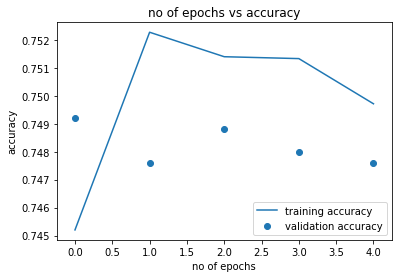

In [21]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

#### Number of epochs vs training and validation loss.

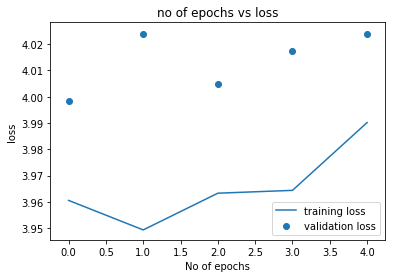

In [22]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

# GoogLeNet/Inception:
The Inception network on the other hand, was complex (heavily engineered). It used a lot of tricks to push performance; both in terms of speed and accuracy. Its constant evolution lead to the creation of several versions of the network. The popular versions are as follows:
1. Inception v1.
2. Inception v2 and Inception v3.
3. Inception v4 and Inception-ResNet.
Each version is an iterative improvement over the previous one. Understanding the upgrades can help us to build custom classifiers that are optimized both in speed and accuracy. Also, depending on your data, a lower version may actually work better.
#### Causes for the evolution of inception:
Salient parts in the image can have extremely large variation in size. For instance, an image with a dog can be either of the following, as shown below. The area occupied by the dog is different in each image.
![](https://cdn-images-1.medium.com/max/1000/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg)
Because of this huge variation in the location of the information, choosing the right kernel size for the convolution operation becomes tough. A larger kernel is preferred for information that is distributed more globally, and a smaller kernel is preferred for information that is distributed more locally.
Very deep networks are prone to overfitting. It also hard to pass gradient updates through the entire network.
Naively stacking large convolution operations is computationally expensive.

#### The solution:
Why not have filters with multiple sizes operate on the same level? The network essentially would get a bit “wider” rather than “deeper”. The authors designed the inception module to reflect the same.
The below image is the “naive” inception module. It performs convolution on an input, with 3 different sizes of filters (1x1, 3x3, 5x5). Additionally, max pooling is also performed. The outputs are concatenated and sent to the next inception module.
![](https://cdn-images-1.medium.com/max/1000/1*DKjGRDd_lJeUfVlY50ojOA.png)
As stated before, deep neural networks are computationally expensive. To make it cheaper, the authors limit the number of input channels by adding an extra 1x1 convolution before the 3x3 and 5x5 convolutions. Though adding an extra operation may seem counterintuitive, 1x1 convolutions are far more cheaper than 5x5 convolutions, and the reduced number of input channels also help. Do note that however, the 1x1 convolution is introduced after the max pooling layer, rather than before.
![](https://cdn-images-1.medium.com/max/1000/1*U_McJnp7Fnif-lw9iIC5Bw.png)
Using the dimension reduced inception module, a neural network architecture was built. This was popularly known as GoogLeNet (Inception v1). The architecture is shown below:
![](https://cdn-images-1.medium.com/max/1000/1*uW81y16b-ptBDV8SIT1beQ.png)
This is the basic idea behind the evolution of inception net if you want to learn about other versions go to [here](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202)

In [23]:
inception_model = applications.inception_v3.InceptionV3(weights = "imagenet", include_top=False, input_shape = (150, 150, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [24]:
inception_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_6 (

In [25]:
for layer in inception_model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = inception_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

# creating the final model 
model_final =  Model(inputs=inception_model.input, outputs=predictions)

In [26]:
model_final.compile(loss='binary_crossentropy',optimizer=optimizers.adam(),metrics=['acc'])

In [27]:
history=model_final.fit_generator(train_generator,steps_per_epoch=100,epochs=5,validation_data=validation_generator,validation_steps=50)

Epoch 1/5
100/100 [==============================] - 52s 522ms/step - loss: 0.2206 - acc: 0.9557 - val_loss: 1.2472 - val_acc: 0.6476
Epoch 2/5
100/100 [==============================] - 33s 331ms/step - loss: 0.0397 - acc: 0.9861 - val_loss: 2.7242 - val_acc: 0.7508
Epoch 3/5
100/100 [==============================] - 32s 316ms/step - loss: 0.0155 - acc: 0.9945 - val_loss: 1.2993 - val_acc: 0.7324
Epoch 4/5
100/100 [==============================] - 32s 315ms/step - loss: 0.0110 - acc: 0.9965 - val_loss: 0.8065 - val_acc: 0.8360
Epoch 5/5
100/100 [==============================] - 32s 316ms/step - loss: 0.1697 - acc: 0.9869 - val_loss: 1.5047 - val_acc: 0.7176


#### Epochs vs training and validation accuracy

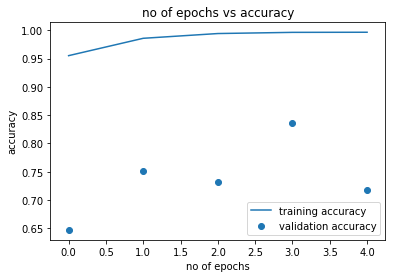

In [28]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

#### Epochs vs training and validation losses

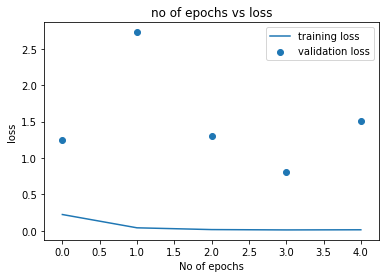

In [29]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

# Xception Net:
If we have to understand xception network we need to understand depthwise convolutions.These type of CNN’s are widely used because of the following two reasons –

* They have lesser number of parameters to adjust as compared to the standard CNN’s, which reduces overfitting.
* They are computationally cheaper because of fewer computations which makes them suitable for mobile vision applications.
This depth wise convolution process is broken down into 2 operations –
1. Depth-wise convolutions
2. Point-wise convolutions
## DEPTH WISE CONVOLUTION:
In depth-wise operation, convolution is applied to a single channel at a time unlike standard CNN’s in which it is done for all the M channels. So here the filters/kernels will be of size Dk x Dk x 1. Given there are M channels in the input data, then M such filters are required. Output will be of size Dp x Dp x M.
![](https://cdn-images-1.medium.com/max/1000/1*yG6z6ESzsRW-9q5F_neOsg.png)
Each 5x5x1 kernel iterates 1 channel of the image (note: 1 channel, not all channels), getting the scalar products of every 25 pixel group, giving out a 8x8x1 image. Stacking these images together creates a 8x8x3 image.
## POINT WISE CONVOLUTION:
The pointwise convolution is so named because it uses a 1x1 kernel, or a kernel that iterates through every single point. This kernel has a depth of however many channels the input image has; in our case, 3. Therefore, we iterate a 1x1x3 kernel through our 8x8x3 image, to get a 8x8x1 image.
![](https://cdn-images-1.medium.com/max/1000/1*37sVdBZZ9VK50pcAklh8AQ.png)
We can create 256 1x1x3 kernels that output a 8x8x1 image each to get a final image of shape 8x8x256.
![](https://cdn-images-1.medium.com/max/1000/1*Q7a20gyuunpJzXGnWayUDQ.png)
## Complete architecture of depth wise separable convolution:
![](https://cdn-images-1.medium.com/max/1000/1*VvBTMkVRus6bWOqrK1SlLQ.png)
## Modified Depthwise Separable Convolution in Xception:
The google researchers modified depthwise separable convolution with pointwise convolution followed by depthwise convolution.below is the image. 
![](https://cdn-images-1.medium.com/max/1000/1*J8dborzVBRBupJfvR7YhuA.png)
## Overall architecture of xception:
![](https://cdn-images-1.medium.com/max/1000/1*hOcAEj9QzqgBXcwUzmEvSg.png)

In [30]:
# uncomment this to run
#xception_model = applications.xception.Xception(weights = "imagenet", include_top=False, input_shape = (150, 150, 3))

In [31]:
#uncomment this to run
#xception_model.summary()

In [32]:
#uncomment this to run
'''for layer in xception_model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = xception_model.output
x = Flatten()(x)
x = Dense(1024,activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

# creating the final model 
model_final =  Model(inputs=xception_model.input, outputs=predictions)'''

'for layer in xception_model.layers[:5]:\n    layer.trainable = False\n\n#Adding custom Layers \nx = xception_model.output\nx = Flatten()(x)\nx = Dense(1024,activation="relu")(x)\nx = Dropout(0.5)(x)\nx = Dense(1024, activation="relu")(x)\nx = Dropout(0.5)(x)\npredictions = Dense(1, activation="sigmoid")(x)\n\n# creating the final model \nmodel_final =  Model(inputs=xception_model.input, outputs=predictions)'

In [33]:
#model_final.compile(loss='binary_crossentropy',optimizer=optimizers.adam(),metrics=['acc'])

In [34]:
#Uncomment this to run the model
#history=model_final.fit_generator(train_generator,steps_per_epoch=200,epochs=1,validation_data=validation_generator,validation_steps=150)

# Mobile net:
MobileNet is an architecture which is more suitable for mobile and embedded based vision applications where there is lack of compute power. This architecture was proposed by Google.Similarly like xception networks the mobile net uses depthwise separable covolutions.
## Architecture:
![](https://www.researchgate.net/publication/327134257/figure/fig2/AS:661949444530178@1534832454962/Original-architecture-of-MobileNet-as-shown-in-the-MobileNet-paper-The-architecture-is.png)

In [35]:
mobile_model = applications.mobilenet.MobileNet(weights = "imagenet", include_top=False, input_shape = (150, 150, 3))

/opt/conda/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 0s 0us/step


In [36]:
for layer in mobile_model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = mobile_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

# creating the final model 
model_final =  Model(inputs=mobile_model.input, outputs=predictions)
model_final.compile(loss='binary_crossentropy',optimizer=optimizers.adam(),metrics=['acc'])

In [37]:
history=model_final.fit_generator(train_generator,steps_per_epoch=100,epochs=5,validation_data=validation_generator,validation_steps=50)

Epoch 1/5
100/100 [==============================] - 46s 461ms/step - loss: 0.1544 - acc: 0.9709 - val_loss: 0.7339 - val_acc: 0.8684
Epoch 2/5
100/100 [==============================] - 35s 353ms/step - loss: 0.0145 - acc: 0.9947 - val_loss: 1.5218 - val_acc: 0.8200
Epoch 3/5
100/100 [==============================] - 34s 336ms/step - loss: 0.0096 - acc: 0.9969 - val_loss: 3.9670 - val_acc: 0.6048
Epoch 4/5
100/100 [==============================] - 33s 334ms/step - loss: 0.0102 - acc: 0.9969 - val_loss: 2.3398 - val_acc: 0.7140
Epoch 5/5
100/100 [==============================] - 33s 334ms/step - loss: 0.0066 - acc: 0.9979 - val_loss: 3.1685 - val_acc: 0.6756


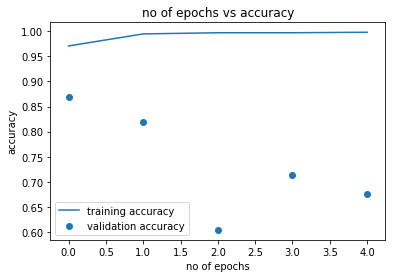

In [38]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

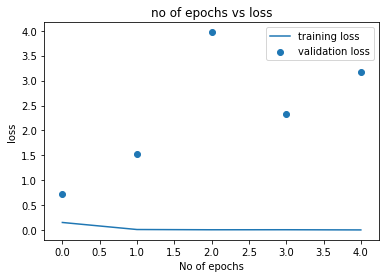

In [39]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

# Resnet:
By increasing network depth does not work by simply stacking layers together. Deep networks are hard to train because of the notorious vanishing gradient problem — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient infinitively small. As a result, as the network goes deeper, its performance gets saturated or even starts degrading rapidly.Before ResNet, there had been several ways to deal the vanishing gradient issue, for instance,adds an auxiliary loss in a middle layer as extra supervision, but none seemed to really tackle the problem once and for all.
In simple words, a residual module has two options, either it can perform a set of functions on the input, or it can skip this step altogether.

The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers, as shown in the following figure:
![](https://cdn-images-1.medium.com/max/750/1*ByrVJspW-TefwlH7OLxNkg.png)
## The architecture:
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/08131926/temp12.png)

## lets see resnet50

In [40]:
resnet_model = applications.resnet50.ResNet50(weights = "imagenet", include_top=False, input_shape = (150, 150, 3))

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [41]:
for layer in resnet_model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = resnet_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

# creating the final model 
model_final =  Model(inputs=resnet_model.input, outputs=predictions)
model_final.compile(loss='binary_crossentropy',optimizer=optimizers.adam(),metrics=['acc'])

In [42]:
history=model_final.fit_generator(train_generator,steps_per_epoch=100,epochs=5,validation_data=validation_generator,validation_steps=50)

Epoch 1/5
100/100 [==============================] - 73s 734ms/step - loss: 3.9465 - acc: 0.7478 - val_loss: 3.9473 - val_acc: 0.7524
Epoch 2/5
100/100 [==============================] - 52s 522ms/step - loss: 4.0748 - acc: 0.7444 - val_loss: 4.0685 - val_acc: 0.7448
Epoch 3/5
100/100 [==============================] - 52s 523ms/step - loss: 3.9403 - acc: 0.7528 - val_loss: 3.9984 - val_acc: 0.7492
Epoch 4/5
100/100 [==============================] - 52s 522ms/step - loss: 3.8797 - acc: 0.7566 - val_loss: 3.9346 - val_acc: 0.7532
Epoch 5/5
100/100 [==============================] - 52s 522ms/step - loss: 3.9828 - acc: 0.7502 - val_loss: 4.1195 - val_acc: 0.7416


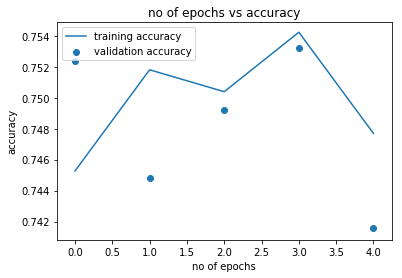

In [43]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

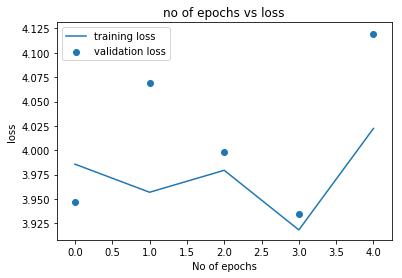

In [44]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

## References and credits:
1. For the Over view of resnets see this [blog](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035) <br>
2. Understanding depthwise separable convolutions and xception see this [post](https://towardsdatascience.com/review-xception-with-depthwise-separable-convolution-better-than-inception-v3-image-dc967dd42568)
3. Understanding inception [networks](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202)
4. code references and snippets from [keras](https://keras.io/applications/#mobilenet)
5. Different [architectures](https://www.analyticsvidhya.com/blog/2017/08/10-advanced-deep-learning-architectures-data-scientists/)
6. Convolutional neural networks are fantastic for visual recognition [tasks](https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/)

### Thanks for reading,Please give suggestions(if any) in the comments. I will continue this tutorial series with more advacned architectures.Hope you enjoyed reading.Upvote if you like the kernel.